<b>17-10-2022

A regular expression is a special text string for describing a search pattern

* Used to search for a specific string in a large amount of data. 
* Verify whether that is in a particular format or not
* Find and replace it with another string
* Format the data into a proper form for importing

The string-

Janice is 22 and Theon is 33

Gabriel is 44 and Joey is 21

Convert it into a dictionary:
> {'Janice': 22, 'Theon':33, 'Gabriel':44, 'Joey':21}

Every name starts with an uppercase letter and age is represented by integers.


### findall-

returns list of matches

![](https://www.guru99.com/images/Pythonnew/Python14.6.png)

In [1]:
import re

In [2]:
nameAge = '''
Janice is 22 and Theon is 33
Gabriel is 44 and Joey is 21
'''

In [3]:
ages = re.findall(r'\d{1,3}', nameAge)
names = re.findall(r'[A-Z][a-z]*',nameAge )

In [4]:
ageDict = {}

In [5]:
x = 0

In [6]:
for eachname in names:
    
    ageDict[eachname] = ages[x]
    x+=1

In [7]:
print(ageDict)

{'Janice': '22', 'Theon': '33', 'Gabriel': '44', 'Joey': '21'}


### search-
searches for given pattern in string

![](https://www.guru99.com/images/Pythonnew/Python14.5.png)

In [8]:
if re.search("inform", "we need to inform him with the latest information"):
    print("There is inform")

There is inform


In [9]:
allinform  = re.findall("inform", "we need to inform him with the latest information") #returns a list of matches

In [10]:
for i in allinform:
    print(i)

inform
inform


<b> 18-10-2022

How to generate an iterator?

Get beginning and ending index of the match

`.span()` returns a tuple containing the start-, and end positions of the match.

In [11]:
string = "we need to inform him with the latest information"

In [12]:
for i in re.finditer("inform", string):
    tup = i.span()
    print(tup)

(11, 17)
(38, 44)


Thus, this function returned the first index of the word `inform` and last index of the same for both the matches that we've got in the `string`.


First, `finditer()` returns the object that we're looking for- inform. Then, `span()` returns the first and last index of the object

One difference between `finditer` and `findall` is that the former returns regex match objects whereas the other returns a tuple of the matched capturing groups (or the entire match if there are no capturing groups).

re.findall(pattern.string)

findall() returns all non-overlapping matches of pattern in string as a list of strings.

re.finditer()

finditer() returns callable object.

In both functions, the string is scanned from left to right and matches are returned in order found.

### Metachars

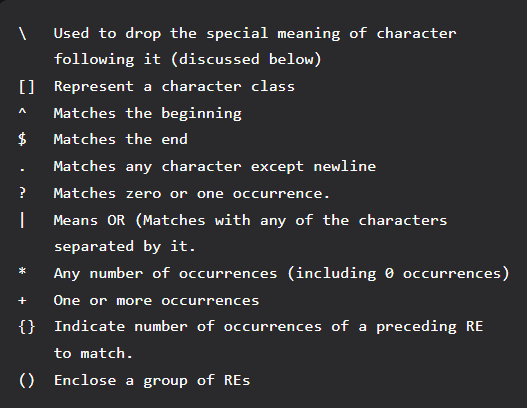


search vs findall- https://www.geeksforgeeks.org/python-regex-re-search-vs-re-findall/?id=discuss

Match words with a particular pattern

In [13]:
Str = "Sat, hat, mat, pat, shit"

In [14]:
at = re.findall("[shmp]at", Str) 
#[shmp] shows that we have to match s, h, m, p specifically for the words
#that start with shmp. Hence, shmp is the character class which we are looking for.

In [15]:
for i in at:
    print(i)

hat
mat
pat


Sat did not get printed as the case of `s` in the character class and actual string is different. 

Match series of range of characters

In [16]:
RangStr = "Sat, hat, mat, pat"

In [17]:
hnm = re.findall("[h-m]at", RangStr) # all the strings that start from h to m and end with at

In [18]:
hnm

['hat', 'mat']

Printing series of range of characters other than the match

In [19]:
hm = re.findall("[^h-m]at", RangStr) # ^ indicates not operation

In [20]:
hm

['Sat', 'pat']

#### 19-10-2022

Replace a string

for more- https://pynative.com/python-regex-compile/

In [21]:
Fooo = 'rat hat mat pat'

Python’s re.compile() method is used to compile a regular expression pattern provided as a string into a regex pattern object (re.Pattern). Later we can use this pattern object to search for a match inside different target strings using regex methods such as a re.match() or re.search().

In simple terms, We can compile a regular expression into a regex object to look for occurrences of the same pattern inside various target strings without rewriting it.

In [22]:
reg = re.compile("[r]at") #used to compile a regular expression pattern provided as a string into a regex pattern object

In [24]:
Fooo = reg.sub("food", Fooo)

#sub() substitutes the pattern that is saved in reg object with
#the string that is in the parameters of the sub() function.

#basically-
# compile() saves the [r]at pattern into reg object. 
# later we use this reg object to substitute with "food" using sub()

In [25]:
print(Fooo)

food hat mat pat


Solving backslash problems

In [26]:
randstr = "here is \\drogba"

In [28]:
print(randstr)

here is \drogba


Here, only one backslash is being printed while the string object has 2 backslashes.

In [29]:
print(re.search(r"\\drogba", randstr))

<re.Match object; span=(8, 15), match='\\drogba'>


re treats backslash as a special character. Hence, it was able to search and show its match.

Match a single character

In [31]:
randStr = '''
Keep the blue flag
flying high
Chelsea
'''

In [32]:
print(randStr)


Keep the blue flag
flying high
Chelsea



In [33]:
#remove the new lines

regex = re.compile("\n") # save the pattern string in regex

In [35]:
randStr = regex.sub(" ", randStr) # substitute the pattern with space

In [36]:
print(randStr)

 Keep the blue flag flying high Chelsea 


* \b backspace
* \t tab
* \v vertical tab
* \r carriage return
* \f formfeed
* \d matches any number
* \D matches anything but number

In [37]:
demo = "12345"

In [43]:
print("Matches:", len(re.findall("\d", demo)))
# gets all the matches that are numbers in the string demo

Matches: 5


In [44]:
print("Matches:", len(re.findall("\D", demo)))
# gets all the matches except numbers

Matches: 0


Match specific digit

In [45]:
#find 5 in the demo
print("Matches:", len(re.findall("\d{5}", demo)))

Matches: 1


Match digits with certain range

In [46]:
num = "123 1234 12345 123456 1234567"

In [47]:
print("Matches:", len(re.findall("\d{5,7}", num)))

Matches: 3


Usecase 1: Phone numbers

* \w [a-zA-Z0-9_]
* \W [^a-zA-Z0-9]

Phone numbers have this format-

3 numbers - 3 numbers - 4 numbers

In [48]:
phone  = "412-555-1212"

In [57]:
def is_phn(p):
    if re.search("\w{3}-\w{3}-\w{4}", p):
        print("It is a phone number")
    else:
        print("It is not a phone number")
#count of 3 in the first 2 parts and 4 for last part

#you can also use \d in place of \w if you want to make the condition stronger.

In [58]:
is_phn(phone
      )

It is a phone number


In [59]:
p1 = "233-282822-12"

is_phn(p1)

It is not a phone number


Usecase of \w

In [ ]:
#Whether full name is valid or not
#Should have space between first name and last name

